

# Airbnb, **Tokyo, Kantō, Japan**: uma análise exploratória dos dados.

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Tokyo (Tóquio), Kantō, Japan**

Depois de séculos de resistência à influência estrangeira, a Revolução Meiji (1868) abriu os portos do país e transferiu a capital do império japonês de Kyoto para a então cidade de Edo, uma antiga vila de pescadores, que passou a se chamar Tóquio (“capital do leste”).

À beira da baía em que deságua o rio Sumida, a cidade cresceu, foi destruída por um violento terremoto em 1923, reconstruída e destruída de novo nos bombardeios B-29s americanos durante a Segunda Guerra Mundial. 

Em 1964, estava pronta para sediar os Jogos Olímpicos – evento que a cidade abrigaria em 2020, mas foi adiado devido à pandemia do novo coronavírus, o torneio acontecerá entre 23 de julho e 8 de agosto de 2021, quando são esperados milhares de turistas de todas as partes do mundo. As obras, que incluem 10 novos equipamentos esportivos, estão – como é natural em se tratando do Japão – rigorosamente dentro do cronograma. 


Neste *notebook*, iremos introduzir os primeiros passos para uma boa análise exploratória de dados utilizando o *dataset* referentes à cidade **Tokyo, Kantō, Japan**, e ver quais insights podem ser extraídos para facilitar as melhores escolhas dos turistas.

## Obtenção dos Dados

Todos os dados utilizados neste projeto foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para está análise exploratória inicial foi utilizado o seguinte arquivo:



*   listings.csv - *Summary information and metrics for listings in Tokyo (good for visualisations).*






In [0]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df_tokyo = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2020-04-28/visualisations/listings.csv")


## Análise dos Dados

  A análise exploratória de dados, se concentra no primeiro passo de qualquer projeto de ciência de dados, uma área relativamente nova da estatística.
  O campo de análise de dados exploratórios nasceu com o, agora clássico,  livro de Tukey, *Exploratory Data Analysis*, de 1977. Jonhn Tukey, foi um estatístico cujas ideias, apresentadas há mais de 50 anos, foram o fundamento da ciência de dados.

**Dicionário das variáveis**

* ... **id** - número de id gerado para identificar o imóvel
* ... **name** - nome da propriedade anunciada
* ... **host_id** - número de id do proprietário (anfitrião) da propriedade
* ... **host_name** - Nome do anfitrião
* ... **neighbourhood_group** - esta coluna não contém nenhum valor válido
* ... **neighbourhood** - nome do bairro
* ... **latitude** - coordenada da latitude da propriedade
* ... **longitude** - coordenada da longitude da propriedade
* ... **room_type** - informa o tipo de quarto que é oferecido
* ... **price** - preço para alugar o imóvel
* ... **minimum_nights** - quantidade mínima de noites para reservar
* ... **number_of_reviews** - número de reviews que a propriedade possui
* ... **last_review** - data do último review
* ... **reviews_per_month** - quantidade de reviews por mês
* ... **calculated_host_listings_count** - quantidade de imóveis do mesmo anfitrião
* ... **availability_365** - número de dias de disponibilidade dentro de 365 dias



### Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras e últimas entradas.

Este dataset é a versão "resumida" do *Airbnb*. Na mesma página que baixamos o arquivo listings.csv há uma versão mais completa (listings.csv.gz).

In [0]:
# 5 primeiras entradas

df_tokyo.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4183,28,18,2018-07-28,0.18,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11048,3,165,2020-03-04,1.57,1,271
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4171,28,113,2020-02-17,1.18,2,241
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66443,139.65707,Entire home/apt,6952,28,103,2020-04-16,1.39,3,364
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3957,28,103,2019-10-04,1.12,2,340


In [0]:
# 5 últimas entradas
df_tokyo.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15347,43260549,"Double room/shared bathroom/near Akihabara, Ueno",191971770,Hostel,NaN,Chiyoda Ku,35.69129,139.77351,Private room,5027,1,0,NaN,NaN,4,119
15348,43260684,"Twin room/shared bathroom/near Akihabara,Ueno",191971770,Hostel,NaN,Chiyoda Ku,35.69161,139.77422,Private room,5455,1,0,NaN,NaN,4,96
15349,43272924,【ﾏﾝｽﾘｰ限定】 お一人様専用,335257890,Blue,NaN,Shinjuku Ku,35.69960,139.69753,Private room,6972,28,0,NaN,NaN,10,95
15350,43281694,代々木駅徒歩2分 新宿駅徒歩8分 渋谷区,333948576,Kido,NaN,Shibuya Ku,35.68238,139.70195,Entire home/apt,24992,1,0,NaN,NaN,1,176
15351,43286916,japanese house in shinjuku,341561924,Puchi,NaN,Shinjuku Ku,35.70423,139.72478,Entire home/apt,25028,1,0,NaN,NaN,1,365


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [0]:
# identificar o volume de dados do DataFrame

print("Entradas:\t {}".format(df_tokyo.shape[0]))
print("Variáveis:\t{}\n".format(df_tokyo.shape[1]))

display(df_tokyo.dtypes)


Entradas:	 15352
Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Nesta primeira análise identificamos que o nosso dataset possuí 15352 entradas, 16 variáveis do tipo "int" (7), "float" (4) e "object" (5).

Está etapa é importante pois precisamos entender o tipo de variável que estamos trabalhando, em alguns momentos é pertinente converter algumas destas variáveis em números. 


### **Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.







In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df_tokyo.isnull().sum() / df_tokyo.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.170010
last_review                       0.170010
host_name                         0.000717
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64


*   É possivel observar que a variável *neighbourhood_group* apresenta 100% dos seus valores faltantes.
*   As variaveis *reviews_per_month*" e *last_review*, apresentam a mesma porcetagem de valores faltantes, aproximadamente 17%.
*   A variável *host_name* apresentou aproximadamente 0,1% dos valores nulos.

Uma parte crítica do sucesso de um projeto de Aprendizado de Máquina é criar um bom conjunto de características para o treinamento. No processo de limpeza de valores faltantes, temos três opções:


*   Excluir os valores correspondentes
*   Excluir todo o atributo
*   Definir valores para algum valor (zero, a média, intermediária, etc.).

Sabendo disso neste estudo iremos limpar o nosso *dataset*, excluindo os atributos que não são relevantes e apresentam valores faltantes:

* *neighbourhood_group*
* *reviews_per_month*
* *last_review* e 
* *host_name*. 

In [0]:
#excluindo colunas

df_tokyo = df_tokyo.drop(columns=['neighbourhood_group','reviews_per_month','last_review', 'host_name'])


Agora o nosso *dataset* tem variáveis do tipo *float* (2), *int* (7), *object*(3) e nenhum atributo ausente.

### **Qual o tipo de distribuição das variáveis?** 

Outro método rápido de perceber o tipo de dados com o qual você está lidando é traçar um **histograma** para cada atributo numérico. Um histograma mostra o número de instâncias (no eixo *y*) que possuem um determinado intervalo de valores (no eixo *x*).


Para a análise do histograma retiramos as variáveis *id*, *host_id*, uma vez que elas não acrescentam nenhuma informação importante.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


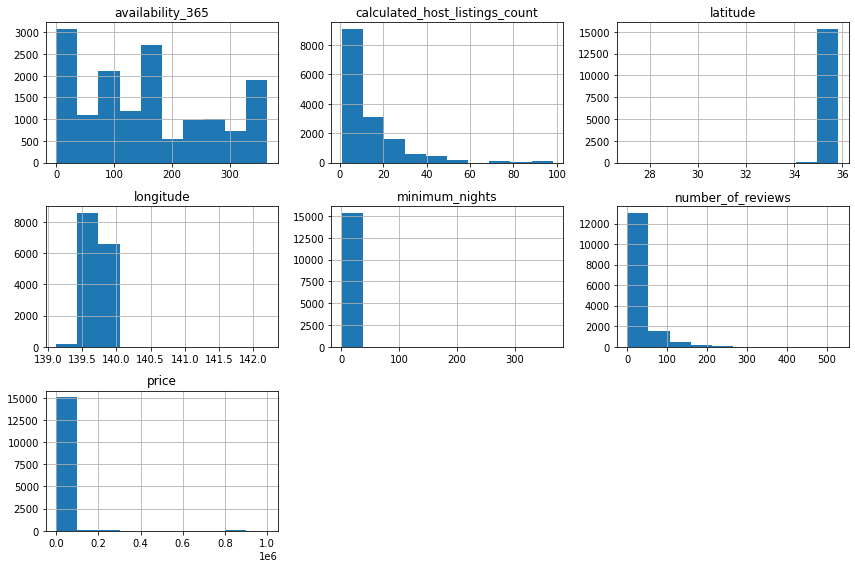

In [0]:
# histograma das variáveis numéricas

fix, ax = plt.subplots(figsize=(12,8))
df_tokyo.drop(columns=['id','host_id']).hist(ax=ax)
plt.tight_layout()


Analisando a distribuição do histograma, é possível verificar que as variáveis *price* e *minimum_nights* não apresentam uma distribuição normal. Este tipo de distribuição é indícios da presença de *outliers*.


### **Há *outliers* presentes?**


Um *outliers* é qualquer valor que seja muito distante de outros valores em um conjunto de dados. Quando os *outliers* são resultados de dados ruins, a média resultará em uma má estimativa de localização, logo eles devem ser investigados e identificados.

Neste estudo os valores das variáveis *price* e *minimum_nights*, não seguem uma distruição, e distorcem a representação gráfica. Para confirmar, há duas maneiras que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.

In [0]:
# resumo estatístico das variáveis numéricas

df_tokyo[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'latitude', 'longitude']].describe()


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,latitude,longitude
count,1.535200e+04,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000
mean,2.624158e+04,3.293968,26.542731,13.434732,155.732348,35.694985,139.735174
std,7.636344e+04,9.114849,40.566386,15.399161,115.567651,0.142427,0.081392
min,0.000000e+00,1.000000,0.000000,1.000000,0.000000,27.072330,139.123190
25%,6.952000e+03,1.000000,2.000000,3.000000,63.000000,35.686230,139.699457
50%,1.197900e+04,1.000000,11.000000,8.000000,150.000000,35.703020,139.728075
75%,2.000100e+04,2.000000,34.000000,18.000000,247.000000,35.725082,139.785050
max,1.000053e+06,365.000000,529.000000,98.000000,365.000000,35.832430,142.202880


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável **price** possui 75% do valor abaixo de 2.000100e+04, porém seu valor máximo é 1.000053e+06.

* A quantidade mínima de noites (**minimum_nights**) possui 75% do valor abaixo de 2 noites, porem seu valor máximo é de 365 dias no ano.

O resumo estatístico sugere a presença de *outliers* nas variáveis **price** e **minimum_nights** corroborando com os dados do histograma.



### Boxplot para minimum_nights

Os boxplots, apresentados por *Tukey* (*Tukey, 1977*), são baseados em percentis e são um modo rápido de visualizar a distribuição dos dados.

Explicando o gráfico: As partes superior e inferior da caixa são o 75% e o 25% percentis, respectivamente. A mediana é mostrada pela linha horizontal na caixa. As linhas pontilhadas, são chamadas de *whiskers*, se estendem do topo e da base para indicar a variação da massa de dados.


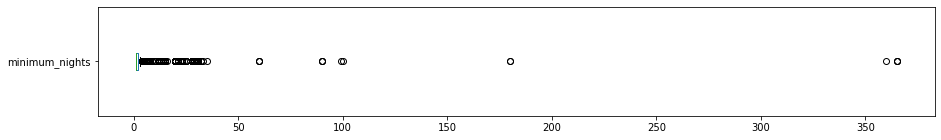

minimum_nights: valores acima de 30:
45 entradas
0.2931%


In [0]:
# minimum_nights

df_tokyo.minimum_nights.plot(kind='box', vert=False, figsize=(15,2))
plt.show()

#quantidade de valores acima de 30 dias para minimum_nights

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df_tokyo[df_tokyo.minimum_nights >30])))
print("{:.4f}%".format((len(df_tokyo[df_tokyo.minimum_nights > 30])/df_tokyo.shape[0])*100))

Podemos observar que exitem 45 entradas acima de 30 dias representando 0,2% de todas as entradas.

### Boxplot para price


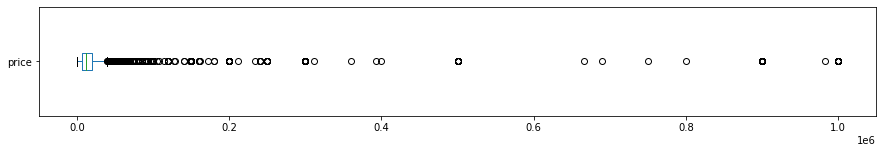

nprice: valores acima de 5.000100e+04:
556 entradas
3.6217%


In [0]:
# price

df_tokyo.price.plot(kind='box', vert=False, figsize=(15,2))
plt.show()


## ver quantidade de valores acima de 10.000100e+04 para price
print("nprice: valores acima de 5.000100e+04:")
print("{} entradas".format(len(df_tokyo[df_tokyo.price > 10.000100e+04])))
print("{:.4f}%".format((len(df_tokyo[df_tokyo.price > 10.000100e+04])/df_tokyo.shape[0])*100))

Podemos observar que exitem 556 entradas acima de 5.000100e+04 representando 3,6% de todas as entradas.

## Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis **price** e **minimum_nights**, vamos agora limpar o DataFrame e plotar novamente o histograma.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # Remove the CWD from sys.path while we load stuff.


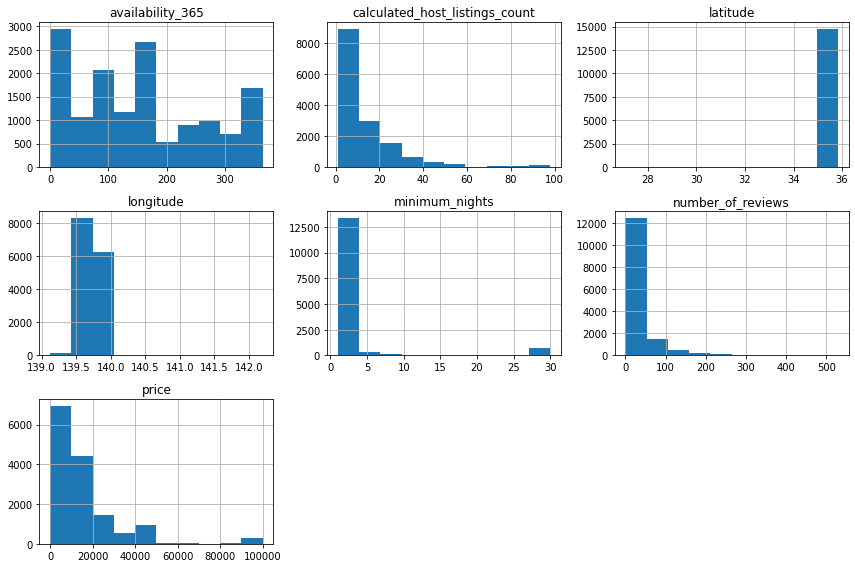

In [0]:
# remover os *outliers* em um novo DataFrame

df_clean = df_tokyo.copy()
df_clean.drop(df_clean[df_clean.price > 10.000100e+04].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# histograma para as variáveis numericas apos limpeza dos *outliers*

fix, ax = plt.subplots(figsize=(12,8))
df_clean.drop(columns=['id','host_id']).hist(ax=ax)
plt.tight_layout()


Veja como as variáveis **price** e **minimum_nights** agora estão apresentando uma distribuição e um deslocando para a esquerda do gráfico.

In [0]:
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'latitude', 'longitude']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,latitude,longitude
count,14751.000000,14751.000000,14751.000000,14751.000000,14751.000000,14751.000000,14751.000000
mean,16699.357535,3.141685,26.951664,12.782930,153.805708,35.695208,139.734882
std,17176.587067,6.453862,41.106143,14.440271,113.856424,0.145076,0.081036
min,0.000000,1.000000,0.000000,1.000000,0.000000,27.072330,139.123190
25%,6952.000000,1.000000,2.000000,3.000000,63.000000,35.687665,139.699030
50%,11048.000000,1.000000,11.000000,8.000000,148.000000,35.703270,139.727210
75%,19951.000000,2.000000,35.000000,17.000000,245.000000,35.725170,139.785740
max,99984.000000,30.000000,529.000000,98.000000,365.000000,35.832430,142.202880


Após a correção dos *outliers* observe que o desvio padrão das variáveis **price** e **minimum_nights** diminuiram ou seja os dados agora estão menos dispersos em torno do valor central, comparado a primeira análise.

### **Qual a correlação existente entre as variáveis**

Aqui vamos entrar no estudo da correlação entre preditores, e entre preditores e uma variável-alvo. Correlação significa que existe uma relação entre duas coisas. Neste contexto, estamos buscando relação ou semelhança entre duas variáveis.

Vamos observar:

* Coeficiente de correlação (também chamdo de *r* de *pearson*): uma métrica que mede o nível em que as variáveis estão associadas umas às outras (varia de -1 a +1). 
* A matrix de correlação: uma tabela na qual as variáveis são mostradas tanto nas linhas quanto nas colunas, e os valores das células são a correlação entre as variáveis.
* Diagrama de dispersão: um gráfico no qual o eixo *X* é o valor de uma variável, e o eixo *Y* é o valor de outra.


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,latitude,longitude
price,1.000000,-0.033926,-0.052773,0.074595,0.122575,0.011891,0.057074
minimum_nights,-0.033926,1.000000,-0.033909,0.059596,0.067767,0.008024,-0.041661
number_of_reviews,-0.052773,-0.033909,1.000000,-0.167410,0.019889,-0.004012,-0.045654
calculated_host_listings_count,0.074595,0.059596,-0.167410,1.000000,0.035458,0.034351,0.066967
availability_365,0.122575,0.067767,0.019889,0.035458,1.000000,-0.022268,0.023304
latitude,0.011891,0.008024,-0.004012,0.034351,-0.022268,1.000000,-0.275997
longitude,0.057074,-0.041661,-0.045654,0.066967,0.023304,-0.275997,1.000000


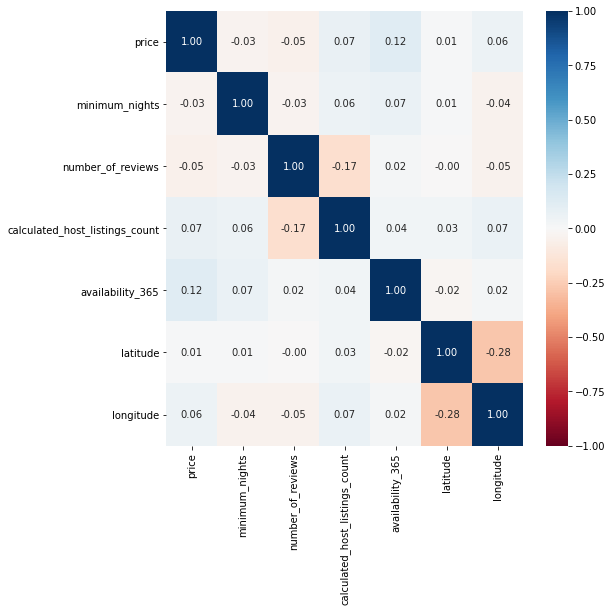

In [0]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'latitude', 'longitude']].corr()

# mostrar a matriz de correlação

display(corr)

# plotar um heatmap a partir das correlações

plt.figure(figsize=(8, 8))
sns.heatmap(corr,annot=True, vmin=-1, vmax=1,center= 0, cmap='RdBu', fmt='.2f')  #plotando a matriz de correlação com o seaborn
plt.show()


Neste *dataset* não observamos correlações relevantes para o desenvolvimento deste projeto. Mas se observarem existe uma correlação entre o **number_of_reviews** e **calculated_host_listings_count**, o que faz sentindo.

### **Qual a média e mediana dos preços de aluguel?**

Variáveis com dados de medição ou contagem podem ter milhares de valores diferentes. Um passo fundamental na exploração de dados é definir um "*valor tipico*" para cada  variável (característica) em estudo: uma estimativa de onde a maioria dos dados está localizada (ou seja, sua tendência central). 

Comparada à média, que usa todas as observações, mediana depende apenas dos valores no centro dos dados classificados. Ainda que isso pareça uma desvantagem, já que a média é muito mais sensível aos dados, é importânte entendermos que existem muitos casos nos quais a mediana é uma métrica melhor para localização. 

A mediana é conhecida também como uma estimativa *robusta* de localização, pois não é influenciada por *outliers* (casos extremos), que podem enviesar os resultados. 

In [0]:
# ver a média da coluna price

print(df_clean['price'].mean())

#ver a mediana da coluna price

print(df_clean['price'].median())

16699.357535082367
11048.0


O valor médio de aluguel em Tokyo no *Airbnb* é de 16699 iene, em reais isso equivale a mais ou menos R$ 770,00*. Já a mediana é de 11048 iene.

*Cotação do dia 08/06/2020

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna minimum_nights

print(df_clean['minimum_nights'].mean())

# Mediana 

print(df_clean['minimum_nights'].median())


3.1416853094705446
1.0


A média do mínimo de noites em Tokyo é de três noites, é interessante observar que a mediana é de 1 noite, aqui ela estar consideando o grupo que fica 28 noites como *outliers*. 

### **Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável *room_type* indica o tipo de locação que está anunciada no *Airbnb*. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método *value_counts()*.

In [0]:
# quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()


Entire home/apt    9317
Private room       3122
Shared room         714
Hotel room          688
Name: room_type, dtype: int64

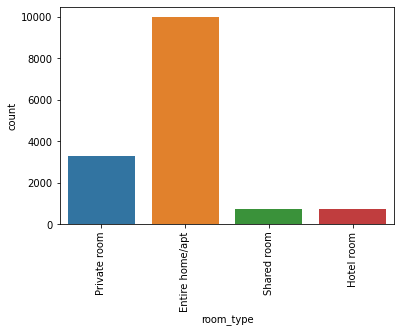

In [0]:
# gráfico de cada tipo de imóvel disponível 

sns.countplot(df_clean.room_type)
plt.xticks(rotation=90);

In [0]:
# porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.673145
Private room       0.225562
Shared room        0.051586
Hotel room         0.049707
Name: room_type, dtype: float64

Como podemos observar em Tokyo a maior disponibilidade (67%) dos imóveis são do tipo apartamentos/casas inteiras.

In [0]:
# ver preços por tipo de imóvel, na média

df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)[:10]

room_type
Entire home/apt    19552.470108
Hotel room         17764.337209
Private room       11099.345932
Shared room         6035.344538
Name: price, dtype: float64

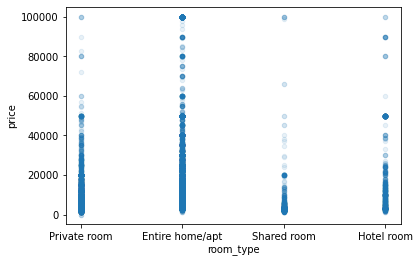

In [0]:
# gráfico preço por tipo de imóvel

df_clean.plot(kind="scatter", x="room_type", y="price",
             alpha=0.1);
            

Os apartamentos/casas inteiras apresentam uma média de preço um pouco maior que os demais tipos. Os quartos compartilhados é opção mais em conta, comparado aos demais.


In [0]:
# número de noites por tipo de imóvel, na média

df_clean.groupby(['room_type']).minimum_nights.mean().sort_values(ascending=False)[:10]

room_type
Entire home/apt    3.360196
Private room       2.882228
Hotel room         2.879240
Shared room        1.573407
Name: minimum_nights, dtype: float64

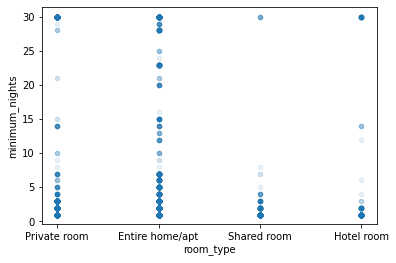

In [0]:
# gráfico número de noites por tipo de imóvel

df_clean.plot(kind="scatter", x="room_type", y="minimum_nights",
             alpha=0.1);

Quando avaliamos o tempo de permanencia dos cliente que optaram por imóveis do tipo apartamentos/casas inteiras, observamos que é basicamente o mesmo quando comparado com o imóveis do tipo quarto privado mesmo ele sendo mais barato, a média não é maior.

Com estes dados podemos sugerir que os clientes que se hospedam em Tokyo tem preferência por uma estadia em um imóvel com maior privacidade, mesmo ele sendo um pouco mais caro. 

### **As 10 localidade mais cara e mai barata de Tokyo?**



In [0]:
# preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Bunkyo Ku        23794.438503
Taito Ku         20262.505780
Shinjuku Ku      18924.676460
Hinohara Mura    18396.600000
Shibuya Ku       18394.085768
Shinagawa Ku     18022.709804
Minato Ku        17915.231729
Sumida Ku        17838.176651
Chuo Ku          16658.686937
Chiyoda Ku       16305.328829
Name: price, dtype: float64

O bairro que apresenta o aluguel mais caro é o **Bunkyo Ku** é uma região especial da Metrópole de Tokyo, no Japão. Bunkyo é a sede do **Tokyo Dome**, um estádio famoso pelos jogos de beisebol dos *Yomiuri Giants* e shows de grandes nomes. Ele está rodeado por um complexo de entretenimento com lojas, restaurantes, parques de aventuras e o Japanese Baseball Hall of Fame. As áreas verdes próximas incluem o *Jardim Botânico Koishikawa* e o *Santuário Nezu*, do século 18, com seu festival de azaleias na primavera.

In [0]:
# preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10]

neighbourhood
Inagi Shi              1764.500000
Musashimurayama Shi    2959.333333
Higashiyamato Shi      2995.000000
Kunitachi Shi          3583.000000
Fussa Shi              3701.000000
Higashikurume Shi      3818.666667
Akishima Shi           3850.000000
Kokubunji Shi          4903.461538
Machida Shi            5331.297297
Hino Shi               5395.160000
Name: price, dtype: float64


O bairro com o aluguel mais barato é **Inagi Shi**. Inagi Shi está localizado na parte sul-central da metrópole de Tokyo, a aproximadamente 25 quilômetros do centro de Tokyo. Os turistas podem visitar *Sanrio Puroland* e *Susukino* são algumas das atrações populares em torno de Inagi-Shi.


### **Visualizando Dados Geográficos**

Este dataset apresenta dados geograficos (latitude e longitude), é sempre bom criar um diagrama de dispersão geográfica para explorar e obter informações.


Considera-se x=longitude e y=latitude

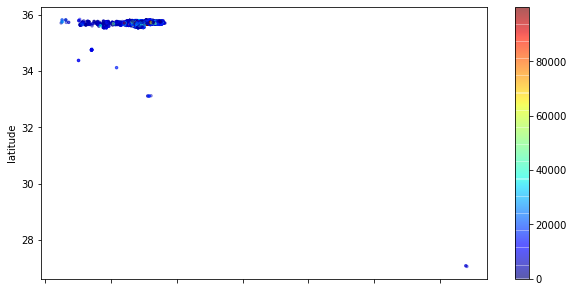

In [0]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=6,
              cmap=plt.get_cmap('jet'), figsize=(10,5));


            

Os dados de longitude apresenta um ponto muito distânte dos demais, iremos excluir este ponto para melhor visualizarmos o diagrama.

In [0]:
# remover os *outliers* em um novo DataFrame (df_clean1)

df_clean1 = df_clean.copy()

df_clean1.drop(df_clean1[df_clean1.longitude > 140.0000].index, axis=0, inplace=True)

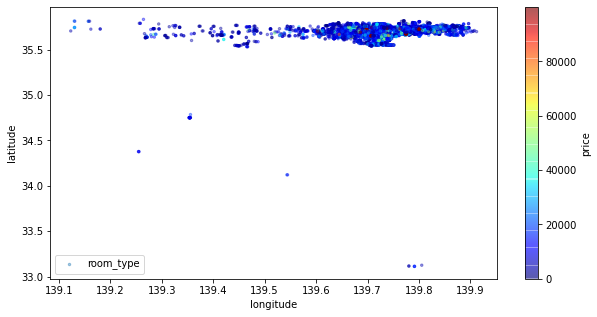

In [0]:
df_clean1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=6, label="room_type", figsize=(10,5),
    c= "price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend();


Agora é possível ver as áreas de alta densidade e com os maiores preços de aluguéis (bolas em vermelho).

## Considerações finais


Esta foi uma análise básica utilizando a base de dados resumida do *Airbnb*. No entanto abordamos conceitos e aplicabilidades importântes para a carreira de **Data science**.

Este projeto mostrou a relevância das etapas de exploração do *Dataset* e um direcionamento na interpretanção das variáveis, limpeza dos dados e escolhas dos melhores atributos antes de ir para a etapa de treinamento. 

Extraímos também informações para quem deseja conhecer Tokyo, como valor médio de aluguel, porcentagem de distribuição dos imóveis, os 10 bairros mais caros e os mais barratos.
